In [1]:
#dependencies:
#for the data-organizing
from datetime import datetime
import csv
import pandas as pd

#for analysis
import numpy as np
import matplotlib.pyplot as plt

#for graphing & maps:
import plotly.express as px
import plotly.graph_objects as go
import folium

#for machine learning:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

### Sample Drupal Log 

In [2]:
data = pd.read_csv("watchdog.csv")

In [3]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d', errors='ignore')

In [4]:
data.head()
data.columns.values
data.describe(include='all')

,wid,type,message,variables,severity,link,location,referer,hostname,date,lat,long,ip
count,52.000000,52,52,52,52.000000,0.0,52,52,52,52,52.000000,52.000000,52
unique,NaN,4,8,52,NaN,NaN,4,2,1,21,NaN,NaN,19
top,NaN,system,%module module installed.,"a:1:{s:7:""%module"";s:17:""menu_link_content"";}",NaN,NaN,https://jan11.dd:8443/core/install.php/?_forma...,https://jan11.dd:8443/core/install.php?rewrite...,127.0.0.1,2020-09-17,NaN,NaN,163.40.178.67
freq,NaN,38,33,1,NaN,NaN,32,51,52,3,NaN,NaN,3
mean,26.500000,NaN,NaN,NaN,5.673077,NaN,NaN,NaN,NaN,NaN,36.678007,-97.567267,NaN
std,15.154757,NaN,NaN,NaN,0.584813,NaN,NaN,NaN,NaN,NaN,4.516374,15.875181,NaN
min,1.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,25.761680,-122.676482,NaN
25%,13.750000,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,33.440079,-111.892114,NaN
50%,26.500000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,36.458392,-96.397488,NaN
75%,39.250000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,39.746528,-84.052425,NaN


<AxesSubplot:title={'center':'Number of Severity by Type'}>

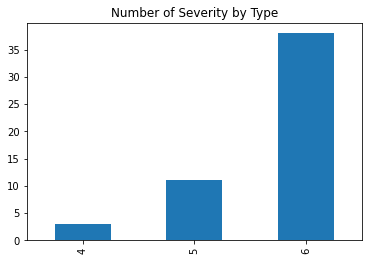

In [5]:
#standard graph
data['severity'].value_counts() #just have this to see the data type
fig = data['severity'].value_counts().plot(kind ="bar", title = "Number of Severity by Type")
fig

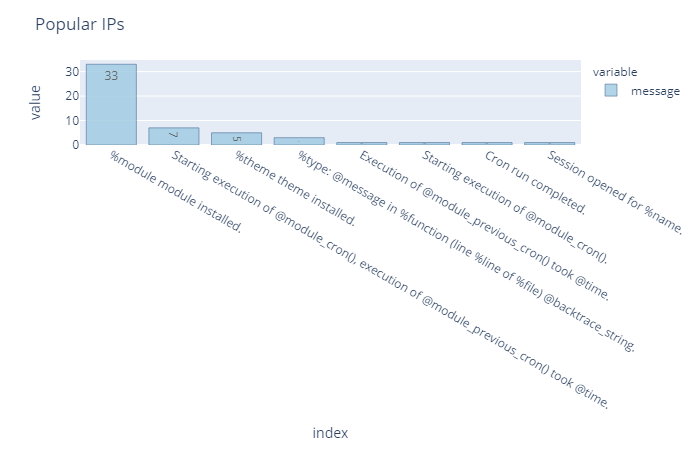

In [12]:
#bar graph of the # of messages
msgDF = pd.DataFrame(data['message'].value_counts())
mBar = px.bar(data['message'].value_counts())
mBar.update_traces(text = msgDF['message'], textposition='inside')
mBar.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=.5, opacity=0.8)
mBar.update_layout(title_text='Popular IPs')
mBar.show("png") #static img
mBar.show() #interactive ver

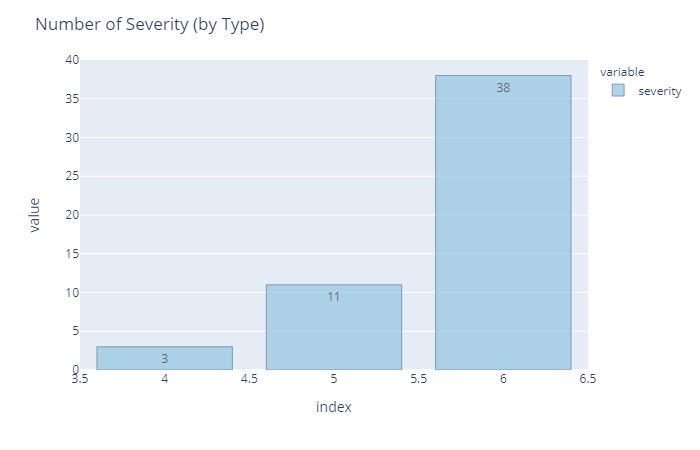

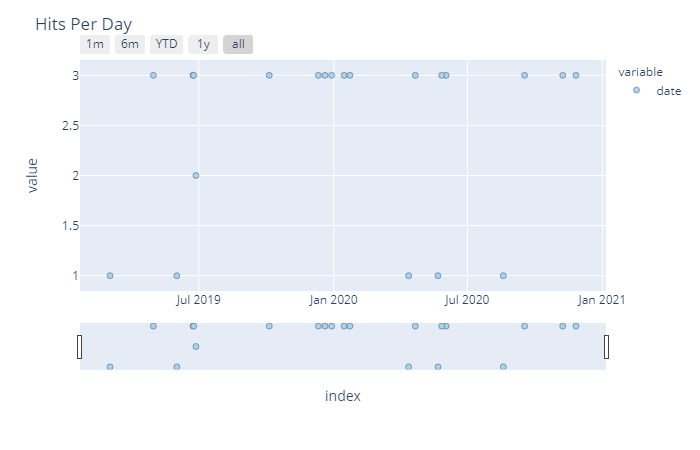

In [7]:
#bar graph of the # of severity types
sampledf = pd.DataFrame(data['severity'].value_counts()) #needed for labels
severBar = px.bar(data['severity'].value_counts())
severBar.update_traces(text = sampledf['severity'], textposition='inside')
severBar.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=.5, opacity=0.8)
severBar.update_layout(title_text='Number of Severity (by Type)')
severBar.show("png") #static img
severBar.show() #interactive ver

#line graph of hits per day
hitsDF = pd.DataFrame(data['date'].value_counts())
hitLine = px.scatter(data['date'].value_counts())
hitLine.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=.5, opacity=0.8)
hitLine.update_layout(title_text='Hits Per Day')
hitLine.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
hitLine.show("png") #static img
hitLine.show() #interactive ver


### Maps:

In [8]:
#chloropath map:
#map to show literal points on map
m = folium.Map(location=[40.1, -100.36], width=750, height=500, zoom_start=4)

data.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["long"]], 
                                              radius=10, fill_color="red", popup= (row['date'])).add_to(m), axis=1)

m

In [9]:
#plotly maps:
# a graph to show the severity of things based on location
#so, plotting where severity areas
fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = data['long'],
        lat = data['lat'],
        text = data['severity'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Blues',
            cmin = 0,
            color = data['severity'],
            cmax = data['severity'].max(),
            colorbar_title="Severity on a Map"
        )))

fig.update_layout(
        title = 'Areas of severity',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )
fig.show()

In [10]:
#super simple express map:
px.scatter_mapbox(data, lat='lat', lon= 'long', zoom=4)


In [11]:
#can't really make an actual chloropath since we don't have any state data, unless...
